In [21]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay 
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [22]:
data = pd.read_csv("train.csv")

In [23]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [24]:
data.shape

(2000, 21)

In [25]:
missing_values = data.isnull().sum()
print("\nКількість пропущених значень в кожній колонці:")
print(missing_values)


Кількість пропущених значень в кожній колонці:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [26]:
data.corr().style.background_gradient(cmap='OrRd')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


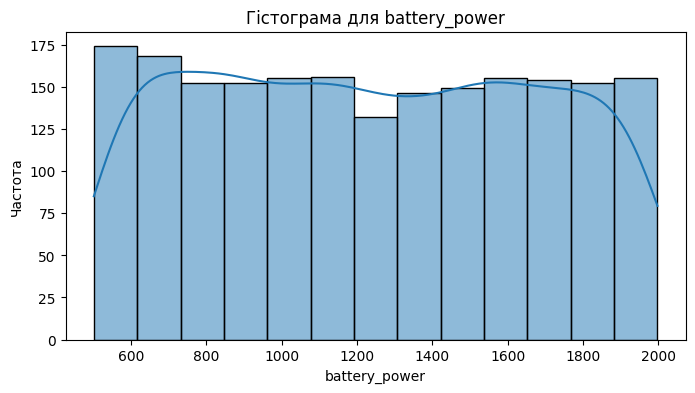

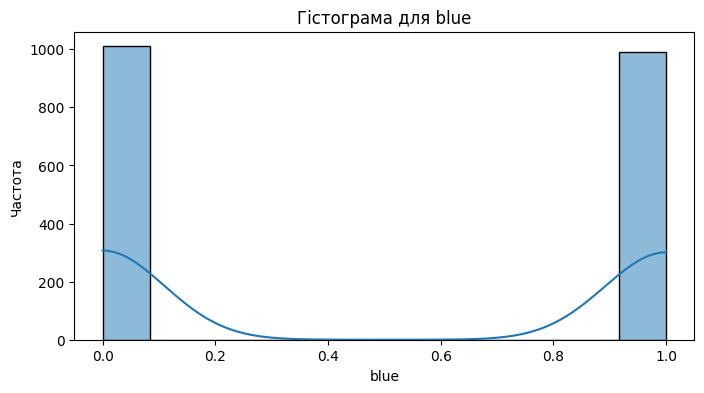

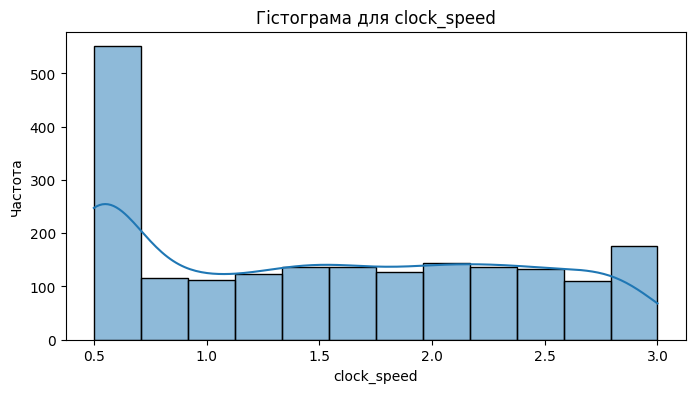

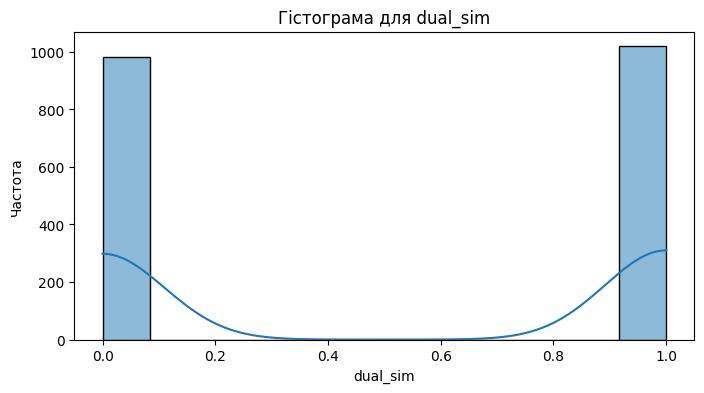

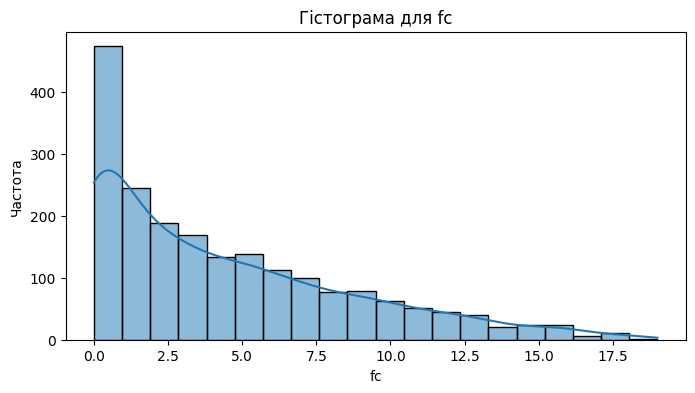

In [7]:
features = data.columns[:5]
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature], kde=True)
    plt.title(f"Гістограма для {feature}")
    plt.xlabel(feature)
    plt.ylabel("Частота")
    plt.show()

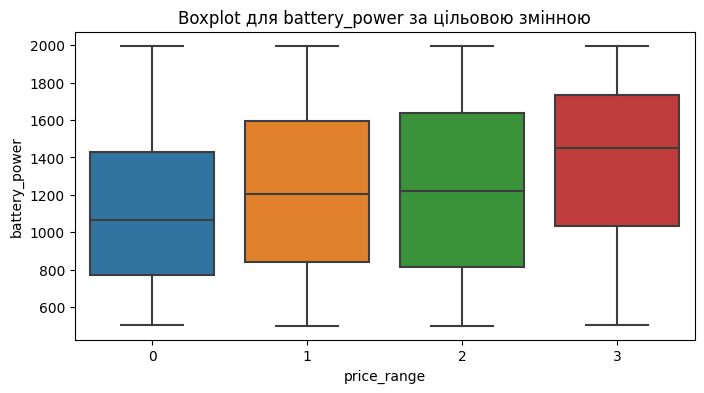

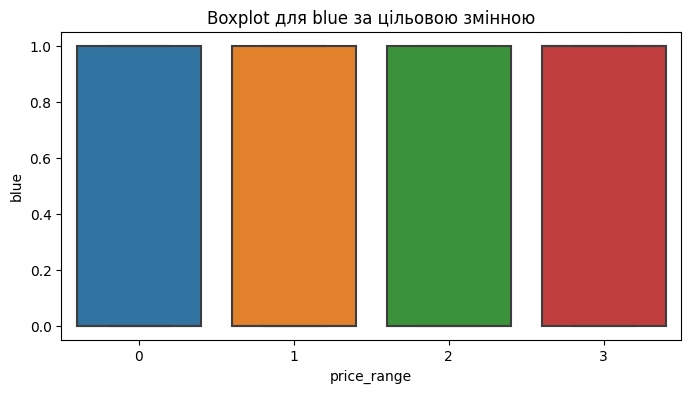

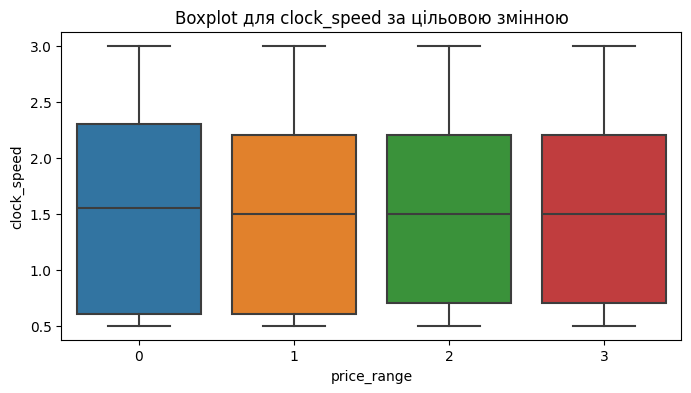

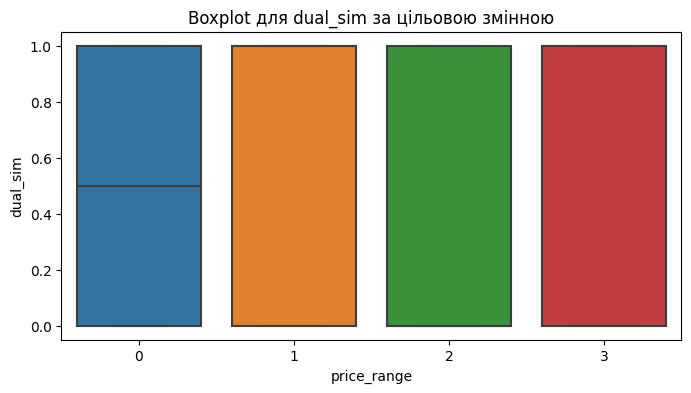

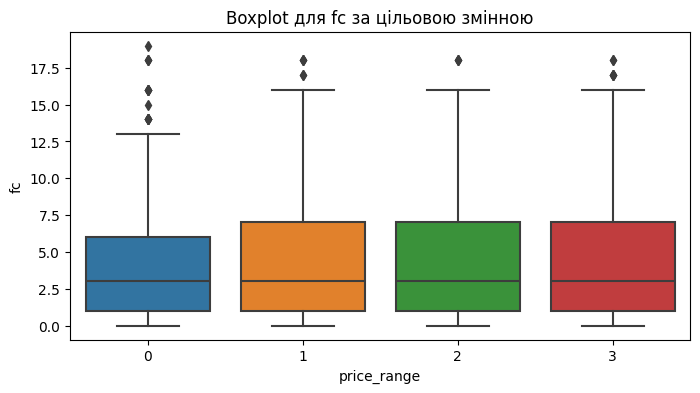

In [8]:
features = data.columns[:5]
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x="price_range", y=feature, data=data)
    plt.title(f"Boxplot для {feature} за цільовою змінною")
    plt.xlabel("price_range")
    plt.ylabel(feature)
    plt.show()

In [9]:
X = data[features].values
y = data['price_range'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

scaled_data = pd.DataFrame(X_scaled, columns=features)

print(scaled_data.head())

   battery_power  blue  clock_speed  dual_sim        fc
0       0.227789   0.0         0.68       0.0  0.052632
1       0.347361   1.0         0.00       1.0  0.000000
2       0.041416   1.0         0.00       1.0  0.105263
3       0.076152   1.0         0.80       0.0  0.000000
4       0.881764   1.0         0.28       0.0  0.684211


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.3,stratify=y)

In [11]:
DS_classifier = DecisionTreeClassifier().fit(X_train,y_train)

In [12]:
RF_classifier = RandomForestClassifier(n_estimators=100).fit(X_train,y_train)

In [13]:
AdaBoost_classifier = AdaBoostClassifier(n_estimators=100).fit(X_train,y_train)

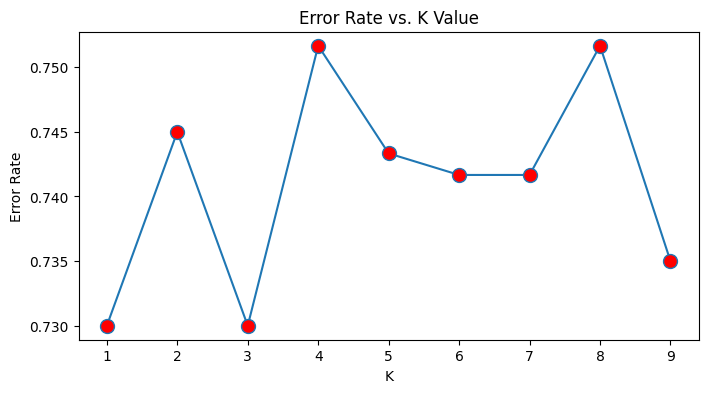

Optimal n_neighbors: 1


In [14]:
error_rate = [np.mean(KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train).predict(X_test) != y_test) for i in range(1, 10)]
optimal_n_neighbors = error_rate.index(min(error_rate)) + 1

plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), error_rate, marker="o", markerfacecolor="red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.show()

print(f"Optimal n_neighbors: {optimal_n_neighbors}")


In [27]:
opt_k = 1
knn_classifier = KNeighborsClassifier(n_neighbors=opt_k)
knn_classifier.fit(X_train, y_train) 


KNeighborsClassifier(n_neighbors=1)

In [28]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']})

In [29]:
print(grid.best_estimator_)

SVC(C=100, gamma=0.01, kernel='sigmoid')


In [30]:
svm_classifier = SVC(C=10, gamma=0.1, kernel='sigmoid').fit(X_train, y_train)

In [31]:
models = {
    'SVM': svm_classifier,
    'KNN': knn_classifier,
    'Random Forest': RF_classifier,
    'Decision Tree': DS_classifier,
    'AdaBoost': AdaBoost_classifier
}

results = {}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    reports = classification_report(y_test, y_pred, output_dict=True)
    confusion = confusion_matrix(y_test, y_pred)
    
    results[model_name] = {
        'classification_report': reports,
        'confusion_matrix': confusion
    }

SVM
              precision    recall  f1-score   support

           0       0.33      0.61      0.43       150
           1       0.25      0.04      0.07       150
           2       0.14      0.03      0.04       150
           3       0.35      0.64      0.45       150

    accuracy                           0.33       600
   macro avg       0.27      0.33      0.25       600
weighted avg       0.27      0.33      0.25       600



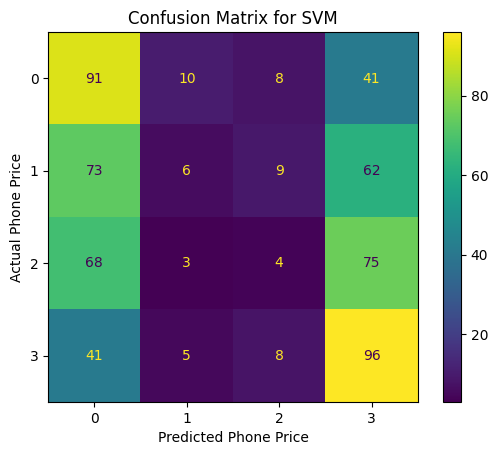

KNN
              precision    recall  f1-score   support

           0       0.28      0.29      0.28       150
           1       0.25      0.25      0.25       150
           2       0.25      0.24      0.24       150
           3       0.31      0.30      0.31       150

    accuracy                           0.27       600
   macro avg       0.27      0.27      0.27       600
weighted avg       0.27      0.27      0.27       600



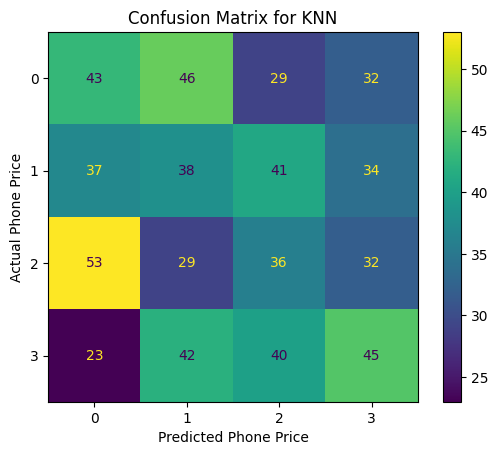

RF
              precision    recall  f1-score   support

           0       0.30      0.30      0.30       150
           1       0.21      0.23      0.22       150
           2       0.32      0.28      0.30       150
           3       0.31      0.32      0.31       150

    accuracy                           0.28       600
   macro avg       0.28      0.28      0.28       600
weighted avg       0.28      0.28      0.28       600



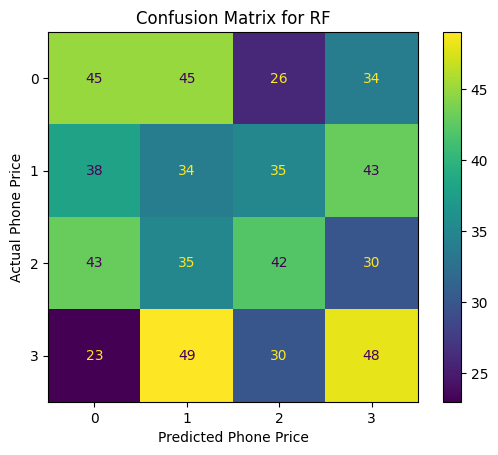

DS
              precision    recall  f1-score   support

           0       0.29      0.26      0.27       150
           1       0.23      0.23      0.23       150
           2       0.26      0.29      0.27       150
           3       0.26      0.25      0.26       150

    accuracy                           0.26       600
   macro avg       0.26      0.26      0.26       600
weighted avg       0.26      0.26      0.26       600



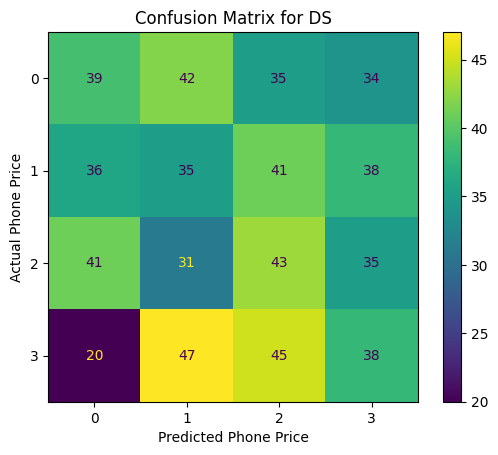

AdaBoost
              precision    recall  f1-score   support

           0       0.31      0.33      0.32       150
           1       0.25      0.20      0.22       150
           2       0.36      0.25      0.29       150
           3       0.34      0.50      0.41       150

    accuracy                           0.32       600
   macro avg       0.32      0.32      0.31       600
weighted avg       0.32      0.32      0.31       600



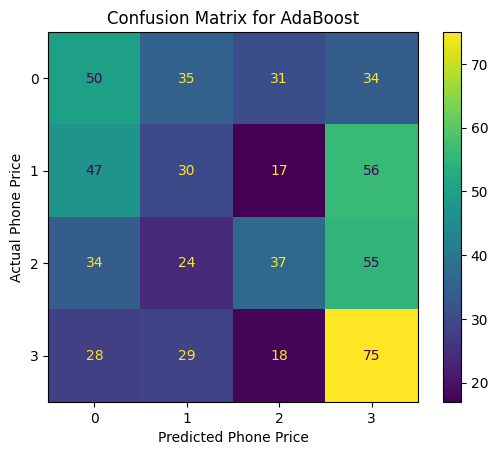

In [32]:
models = {
    'SVM': svm_classifier,
    'KNN': knn_classifier,
    'RF': RF_classifier,
    'DS': DS_classifier,
    'AdaBoost': AdaBoost_classifier
}

for model_name, model in models.items():
    print(model_name)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(report)
    
    cmd_obj = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_)
    cmd_obj.plot()
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Phone Price')
    plt.ylabel('Actual Phone Price')
    plt.show()